In [10]:
import os
# import numpy as np
import matplotlib.pyplot as plt
import random
from ultralytics import YOLO

In [7]:
current_path = os.getcwd()
print(f"Chemin actuel : {current_path}")
# input_path = current_path+"/data/x_test/test/ppommk.jpg"

Chemin actuel : c:\Users\mougi\Documents\TPS\atelier_IA\suez_challenge



image 1/1 c:\Users\mougi\Documents\TPS\atelier_IA\suez_challenge\data\x_test_augmented\train\images\6f2546_jpg.rf.2cbc07aac38ceace2bc04e9acb1131d0.jpg: 480x640 (no detections), 349.6ms
Speed: 23.0ms preprocess, 349.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\mougi\Documents\TPS\atelier_IA\suez_challenge\data\x_test_augmented\train\images\766d82_jpg.rf.9fe33fb00b3ba61673ecad410f278ce8.jpg: 640x576 (no detections), 244.1ms
Speed: 0.0ms preprocess, 244.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 576)

image 1/1 c:\Users\mougi\Documents\TPS\atelier_IA\suez_challenge\data\x_test_augmented\train\images\31603a_jpg.rf.780139564c7da3e0d2a94f80896a37e5.jpg: 640x416 1 parking meter, 206.6ms
Speed: 4.0ms preprocess, 206.6ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 416)

image 1/1 c:\Users\mougi\Documents\TPS\atelier_IA\suez_challenge\data\x_test_augmented\train\images\2c3aa4_jpg.rf.af5d3de96367da565b190ff45a820760

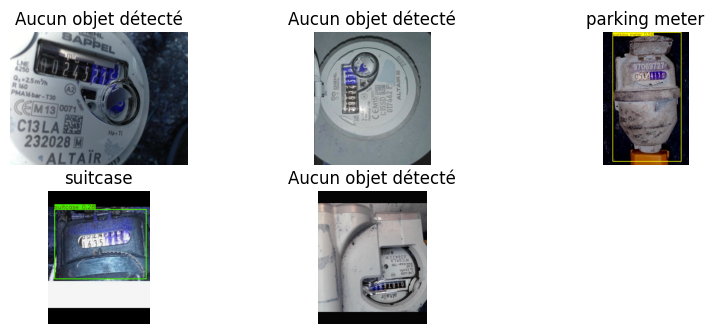

In [11]:
model = YOLO("yolo11n.pt")

# Dossier contenant vos images d'entraînement
folder_path = "./data/x_test_augmented/train/images"  # Chemin du dossier contenant les images
k = 5  # Nombre d'images aléatoires à afficher après détection

# Charger les noms des classes du modèle
class_names = model.names

# Extensions d'images acceptées
valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".tiff"}

# Liste des chemins des images valides
image_paths = [
    os.path.join(folder_path, f)
    for f in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, f)) and os.path.splitext(f)[1].lower() in valid_extensions
]

# Sélectionner aléatoirement k images pour visualisation
selected_images = random.sample(image_paths, k)

# Afficher les résultats sur les images sélectionnées
plt.figure(figsize=(10, 10))
for i, path in enumerate(selected_images, 1):
    results = model(path)  # Effectuer la détection
    detected_classes = results[0].boxes.cls.cpu().numpy().astype(int)  # Récupérer les classes détectées
    object_names = [class_names[idx] for idx in detected_classes]  # Convertir les indices en noms de classes
    title = ", ".join(set(object_names)) if object_names else "Aucun objet détecté"
    
    annotated_image = results[0].plot()  # Générer une image annotée
    plt.subplot(5, 3, i)
    plt.imshow(annotated_image)
    plt.title(title)
    plt.axis("off")

plt.show()


In [13]:
# Chemin vers le fichier de configuration des données
data_yaml = "./data/x_test_augmented/data.yaml"  # Mettez ici le chemin vers votre fichier data.yaml

# Dossier où sauvegarder les résultats des runs
output_dir = "./yolo_finetune_results"
os.makedirs(output_dir, exist_ok=True)

# Charger le modèle pré-entrainé YOLOv8
model = YOLO("yolo11n.pt")  # Vous pouvez utiliser "yolov8s.pt" ou "yolov8m.pt" si besoin

# Entraînement du modèle
model.train(
    data=data_yaml,       # Chemin vers le fichier data.yaml
    epochs=50,            # Nombre d'époques d'entraînement
    batch=16,             # Taille de batch
    imgsz=640,            # Taille des images (redimensionnement)
    project=output_dir,   # Dossier pour sauvegarder les résultats
    name="fine_tuned_yolo",  # Nom de l'expérience
    pretrained=True,      # Utiliser le poids pré-entraîné comme point de départ
    device=-1              # Utiliser GPU (0) ou CPU (-1)
)

# Afficher les résultats de l'entraînement
print("\nFine-tuning du modèle YOLO terminé. Les résultats sont sauvegardés dans:", output_dir)

# Tester le modèle fine-tuné sur le dossier de test si disponible
test_images = "./data/x_test_augmented/test/images"  # Dossier de test
if os.path.exists(test_images):
    print("\nDémarrage des détections sur les images de test...")
    model.val(data=data_yaml)

New https://pypi.org/project/ultralytics/8.3.51 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.10.11 torch-2.2.2+cpu 


ValueError: Invalid CUDA 'device=-1' requested. Use 'device=cpu' or pass valid CUDA device(s) if available, i.e. 'device=0' or 'device=0,1,2,3' for Multi-GPU.

torch.cuda.is_available(): False
torch.cuda.device_count(): 0
os.environ['CUDA_VISIBLE_DEVICES']: None
See https://pytorch.org/get-started/locally/ for up-to-date torch install instructions if no CUDA devices are seen by torch.


In [ ]:
model = YOLO("./yolo_finetune_results/fine_tuned_yolo/weights/best.pt")

# Dossier d'images à tester
# test_images = "./data/x_test_augmented/test/images" #A REDEFINIR

# Détection sur les images
results = model.predict(source=test_images, save=True, imgsz=640)
print("Détection terminée. Images sauvegardées dans le répertoire runs/detect/")